<a href="https://colab.research.google.com/github/GalMoore/Bitcoin_Research/blob/main/BITCOIN_DAILY_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt


In [ ]:

BTC_Ticker = yf.Ticker("BTC-USD")
df = BTC_Ticker.history(period="max")
df.drop(columns=['Dividends', 'Stock Splits'], inplace=True)


In [ ]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2023-03-19 00:00:00+00:00,26969.503906,28440.560547,26907.716797,28038.675781,37769448859
2023-03-20 00:00:00+00:00,28041.601562,28527.724609,27242.880859,27767.236328,44774027664
2023-03-21 00:00:00+00:00,27768.392578,28439.562500,27439.646484,28175.816406,36102192830


In [ ]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
df.index

DatetimeIndex(['2014-09-17 00:00:00+00:00', '2014-09-18 00:00:00+00:00',
               '2014-09-19 00:00:00+00:00', '2014-09-20 00:00:00+00:00',
               '2014-09-21 00:00:00+00:00', '2014-09-22 00:00:00+00:00',
               '2014-09-23 00:00:00+00:00', '2014-09-24 00:00:00+00:00',
               '2014-09-25 00:00:00+00:00', '2014-09-26 00:00:00+00:00',
               ...
               '2023-03-14 00:00:00+00:00', '2023-03-15 00:00:00+00:00',
               '2023-03-16 00:00:00+00:00', '2023-03-17 00:00:00+00:00',
               '2023-03-18 00:00:00+00:00', '2023-03-19 00:00:00+00:00',
               '2023-03-20 00:00:00+00:00', '2023-03-21 00:00:00+00:00',
               '2023-03-22 00:00:00+00:00', '2023-03-23 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=3110, freq=None)

In [ ]:
df["Close"].value_counts().sort_values(ascending=False)

6741.750000     2
236.153000      2
1179.969971     2
2671.780029     1
322.533997      1
               ..
27423.929688    1
26965.878906    1
28038.675781    1
27767.236328    1
28412.238281    1
Name: Close, Length: 3107, dtype: int64

<Axes: xlabel='Date'>

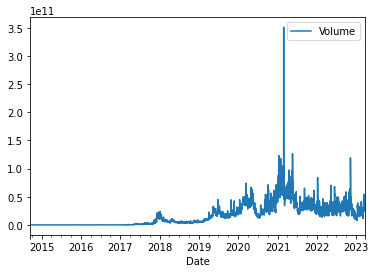

In [ ]:
df.plot(y='Volume', kind='line')

<Axes: xlabel='Date'>

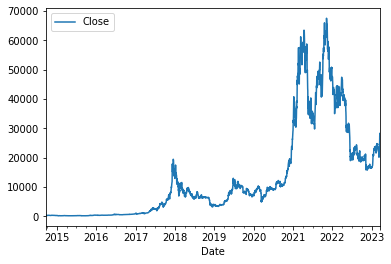

In [ ]:
df.plot(y='Close', kind='line')

In [ ]:
df['day_pct_change'] = df['Close'].pct_change(1)
df['week_pct_change'] = df['Close'].resample('W').last().pct_change(1)
df['month_pct_change'] = df['Close'].resample('M').last().pct_change(1)
df['year_pct_change'] = df['Close'].resample('Y').last().pct_change(1)

In [ ]:
# calculate cumulative percent change over different time periods
df['day_cumulative_pct_change'] = df['Close'].pct_change().add(1).cumprod().sub(1)
df['week_cumulative_pct_change'] = df['Close'].resample('W').last().pct_change().add(1).cumprod().sub(1)
df['month_cumulative_pct_change'] = df['Close'].resample('M').last().pct_change().add(1).cumprod().sub(1)
df['year_cumulative_pct_change'] = df['Close'].resample('Y').last().pct_change().add(1).cumprod().sub(1)


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'day_pct_change',
       'week_pct_change', 'month_pct_change', 'year_pct_change',
       'day_cumulative_pct_change', 'week_cumulative_pct_change',
       'month_cumulative_pct_change', 'year_cumulative_pct_change'],
      dtype='object')

<Axes: xlabel='Date'>

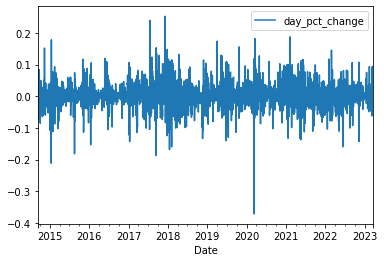

In [ ]:
df.plot(y='day_pct_change', kind='line')

<Axes: xlabel='Date'>

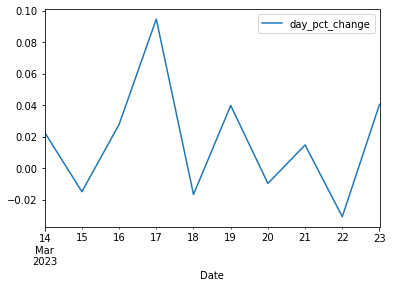

In [ ]:
df.tail(10).plot(y='day_pct_change', kind='line')

<Axes: xlabel='Date'>

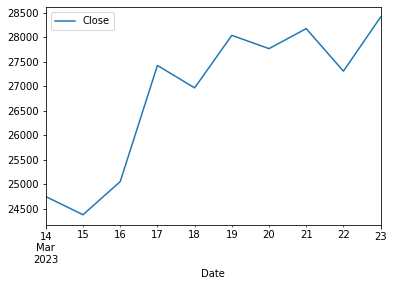

In [ ]:
df.tail(10).plot(y='Close', kind='line')

# daily % change

In [ ]:
def daily_perc_chng(df, strt_day=60, end_day=30):
    last_n_days = df.iloc[-strt_day:-end_day:]
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    ax1.set_ylabel('Close', color='tab:red')
    ax1.plot(last_n_days.index, last_n_days['Close'], color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2.set_ylabel('Volume', color='tab:green') 
    ax2.bar(last_n_days.index, last_n_days['Volume'], color='tab:green')
    ax2.yaxis.set_major_formatter('{:.0f}'.format)  # remove scientific notation

    ax3 = ax1.twinx()
    ax3.set_ylabel('day_pct_change', color='tab:blue')
    ax3.bar(last_n_days.index, last_n_days['day_pct_change'], color='tab:blue', alpha=0.5)
    ax3.tick_params(axis='y', labelcolor='tab:blue')

    # calculate cumulative percent change going up and down
    cumulative_up = (1 + last_n_days['day_pct_change'][last_n_days['day_pct_change'] > 0]).cumprod() - 1
    cumulative_down = (1 + last_n_days['day_pct_change'][last_n_days['day_pct_change'] < 0]).cumprod() - 1

    # calculate % change from first day in period to last day in period
    start_price = last_n_days['Close'][0]
    end_price = last_n_days['Close'][-1]
    pct_change = ((end_price - start_price) / start_price) * 100

    # count number of positive and negative days
    pos_days = len(last_n_days[last_n_days['day_pct_change'] > 0])
    neg_days = len(last_n_days[last_n_days['day_pct_change'] < 0])

    # print results
    print(f"Number of positive days: {pos_days}")
    print(f"Cumulative % change going up: {cumulative_up.iloc[-1]*100:.2f}%")
    print(f"Number of negative days: {neg_days}")
    print(f"Cumulative % change going down: {cumulative_down.iloc[-1]*100:.2f}%")
    print("")
    print(f"% Change from first day to last day: {pct_change:.2f}%")
    print("")
    print(f"Start price: {start_price} on {last_n_days.index[0]}")
    print(f"End price: {end_price} on {last_n_days.index[-1]}")
    print(f"First day: " )
    print(f"Last day: " )

    plt.tight_layout()
    plt.show()

In [ ]:
def streak_lengths(df,strt_day=6, end_day=3):
  df_slice = df.iloc[-strt_day:-end_day:]
  down_mask = df_slice['Close'].diff() < 0
  down_streaks = (down_mask != down_mask.shift()).cumsum()[down_mask]
  if len(down_streaks) > 0:
      max_down_streak = down_streaks.value_counts().max()
      print(f"Largest down streak: {max_down_streak} days")
  else:
      print("There are no down streaks in the data.")

  up_mask = df_slice['Close'].diff() > 0
  up_streaks = (up_mask != up_mask.shift()).cumsum()[up_mask]

  if len(up_streaks) > 0:
      max_up_streak = up_streaks.value_counts().max()
      print(f"Largest up streak: {max_up_streak} days")
  else:
      print("There are no up streaks in the data.")

# last 12 months stats (daily % change)

Largest down streak: 3 days
Largest up streak: 5 days
Number of positive days: 16
Cumulative % change going up: 28.71%
Number of negative days: 14
Cumulative % change going down: -28.02%

% Change from first day to last day: -9.60%

Start price: 43960.93359375 on 2022-03-24 00:00:00+00:00
End price: 39740.3203125 on 2022-04-22 00:00:00+00:00
First day: 
Last day: 


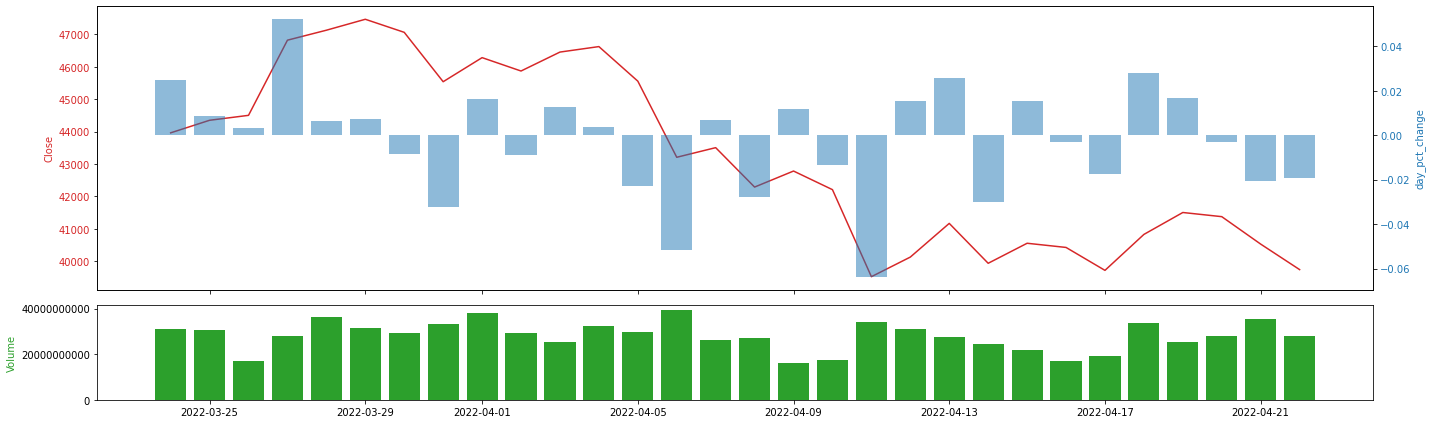

In [ ]:
streak_lengths(df,strt_day=365, end_day=335)
daily_perc_chng(df, strt_day=365, end_day=335)

Largest down streak: 5 days
Largest up streak: 4 days
Number of positive days: 15
Cumulative % change going up: 42.16%
Number of negative days: 15
Cumulative % change going down: -46.32%

% Change from first day to last day: -23.21%

Start price: 39486.73046875 on 2022-04-23 00:00:00+00:00
End price: 30323.72265625 on 2022-05-22 00:00:00+00:00
First day: 
Last day: 


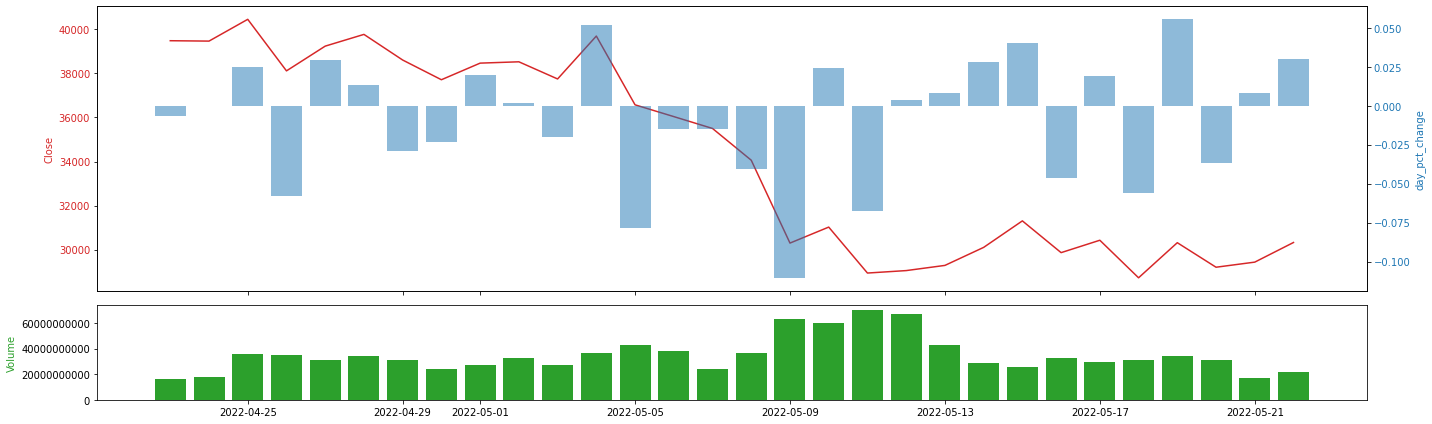

In [ ]:
streak_lengths(df,strt_day=335, end_day=305)
daily_perc_chng(df, strt_day=335, end_day=305)

Largest down streak: 8 days
Largest up streak: 4 days
Number of positive days: 14
Cumulative % change going up: 35.88%
Number of negative days: 16
Cumulative % change going down: -49.74%

% Change from first day to last day: -28.83%

Start price: 29098.91015625 on 2022-05-23 00:00:00+00:00
End price: 20710.59765625 on 2022-06-21 00:00:00+00:00


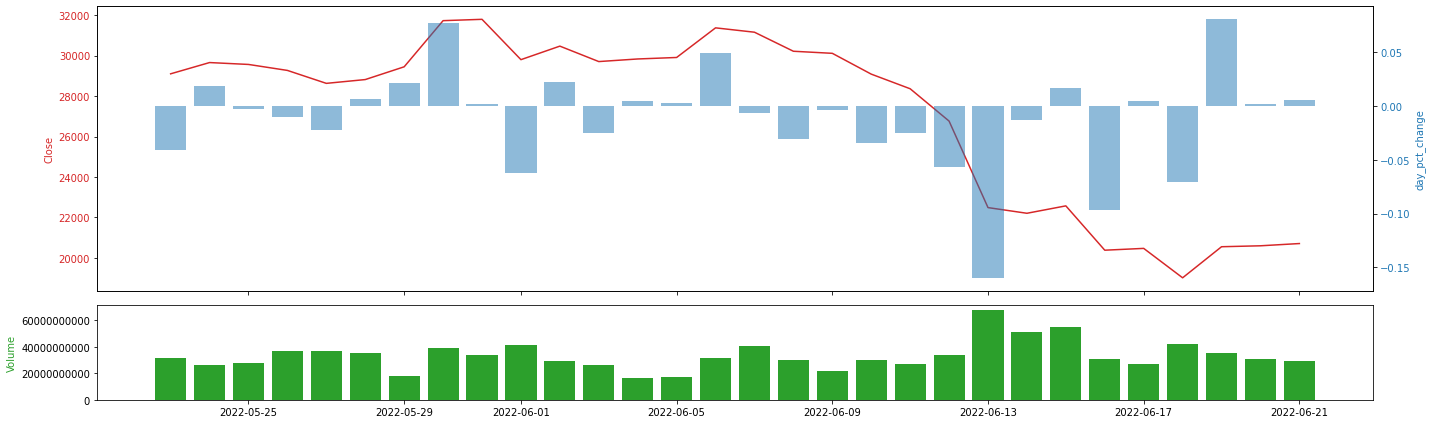

In [ ]:
streak_lengths(df,strt_day=305, end_day=275)
daily_perc_chng(df, strt_day=305, end_day=275)

Largest down streak: 7 days
Largest up streak: 4 days
Number of positive days: 14
Cumulative % change going up: 50.27%
Number of negative days: 16
Cumulative % change going down: -25.57%

% Change from first day to last day: 15.90%

Start price: 19987.029296875 on 2022-06-22 00:00:00+00:00
End price: 23164.62890625 on 2022-07-21 00:00:00+00:00


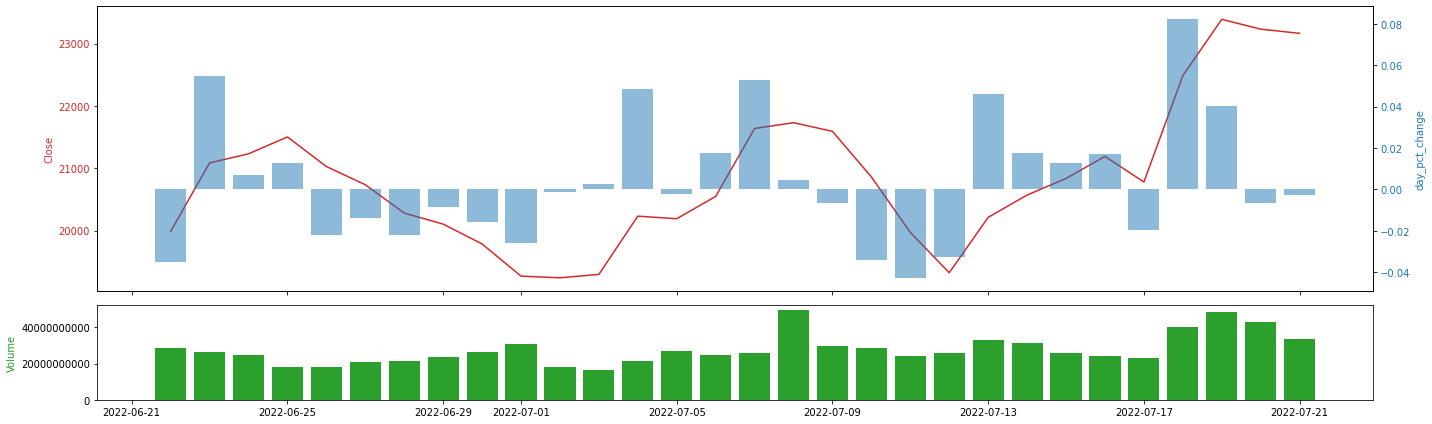

In [ ]:
streak_lengths(df,strt_day=275, end_day=245)
daily_perc_chng(df, strt_day=275, end_day=245)

Largest down streak: 7 days
Largest up streak: 4 days
Number of positive days: 11
Cumulative % change going up: 28.87%
Number of negative days: 19
Cumulative % change going down: -29.10%

% Change from first day to last day: -6.82%

Start price: 22714.978515625 on 2022-07-22 00:00:00+00:00
End price: 21166.060546875 on 2022-08-20 00:00:00+00:00


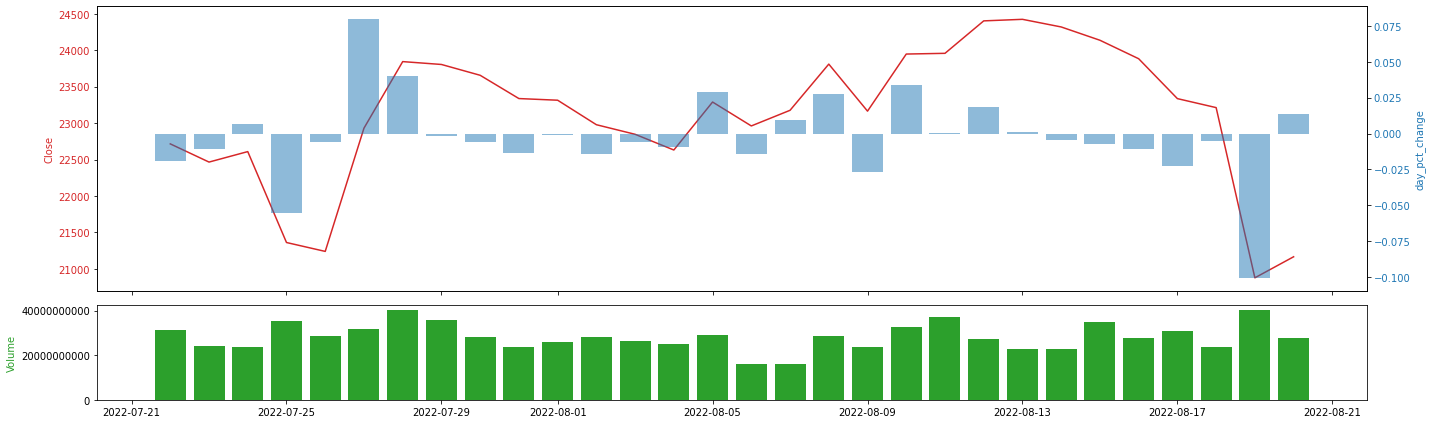

In [ ]:
streak_lengths(df,strt_day=245, end_day=215)
daily_perc_chng(df, strt_day=245, end_day=215)

Largest down streak: 3 days
Largest up streak: 6 days
Number of positive days: 16
Cumulative % change going up: 33.77%
Number of negative days: 14
Cumulative % change going down: -30.97%

% Change from first day to last day: -9.24%

Start price: 21534.12109375 on 2022-08-21 00:00:00+00:00
End price: 19544.12890625 on 2022-09-19 00:00:00+00:00


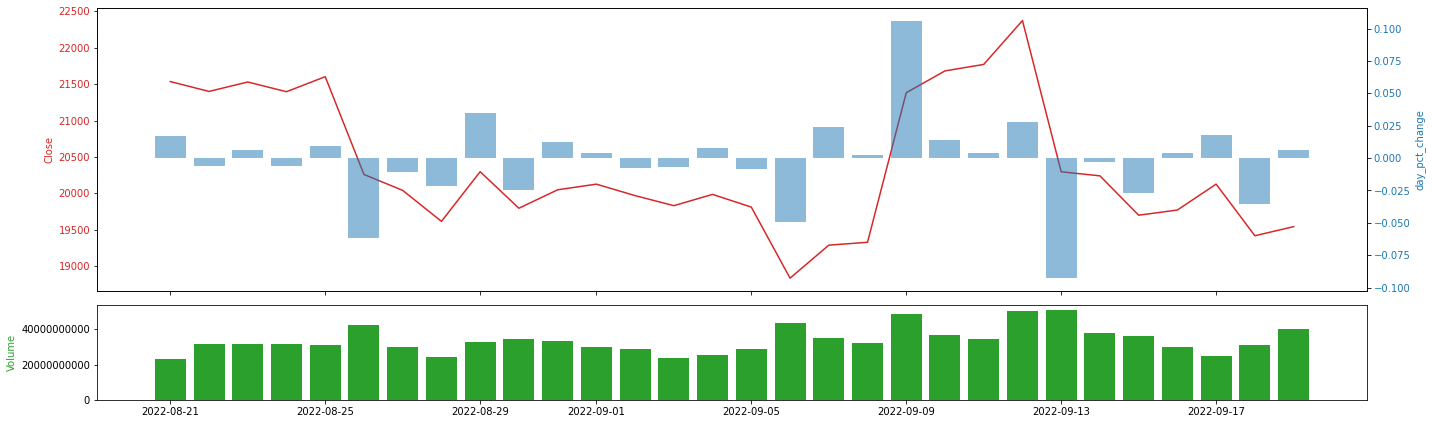

In [ ]:
streak_lengths(df,strt_day=215, end_day=185)
daily_perc_chng(df, strt_day=215, end_day=185)

Largest down streak: 4 days
Largest up streak: 2 days
Number of positive days: 11
Cumulative % change going up: 22.28%
Number of negative days: 19
Cumulative % change going down: -19.91%

% Change from first day to last day: 1.32%

Start price: 18890.7890625 on 2022-09-20 00:00:00+00:00
End price: 19139.53515625 on 2022-10-19 00:00:00+00:00


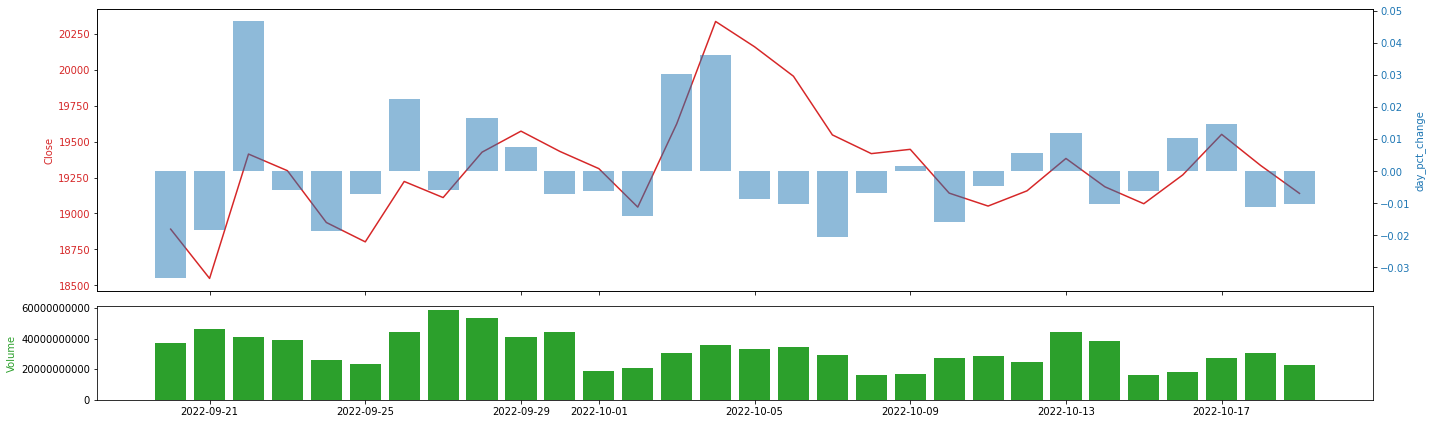

In [ ]:
streak_lengths(df,strt_day=185, end_day=155)
daily_perc_chng(df, strt_day=185, end_day=155)

Largest down streak: 4 days
Largest up streak: 3 days
Number of positive days: 15
Cumulative % change going up: 36.82%
Number of negative days: 15
Cumulative % change going down: -36.24%

% Change from first day to last day: -12.36%

Start price: 19053.740234375 on 2022-10-20 00:00:00+00:00
End price: 16697.77734375 on 2022-11-18 00:00:00+00:00


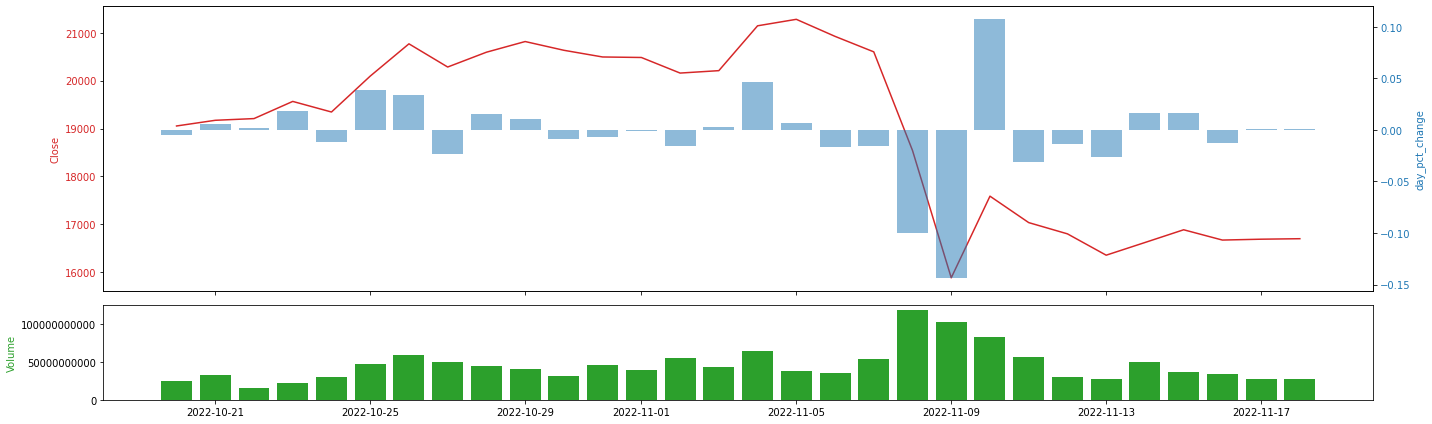

In [ ]:
streak_lengths(df,strt_day=155, end_day=125)
daily_perc_chng(df, strt_day=155, end_day=125)

Largest down streak: 5 days
Largest up streak: 3 days
Number of positive days: 13
Cumulative % change going up: 23.10%
Number of negative days: 17
Cumulative % change going down: -18.47%

% Change from first day to last day: 0.28%

Start price: 16711.546875 on 2022-11-19 00:00:00+00:00
End price: 16757.9765625 on 2022-12-18 00:00:00+00:00


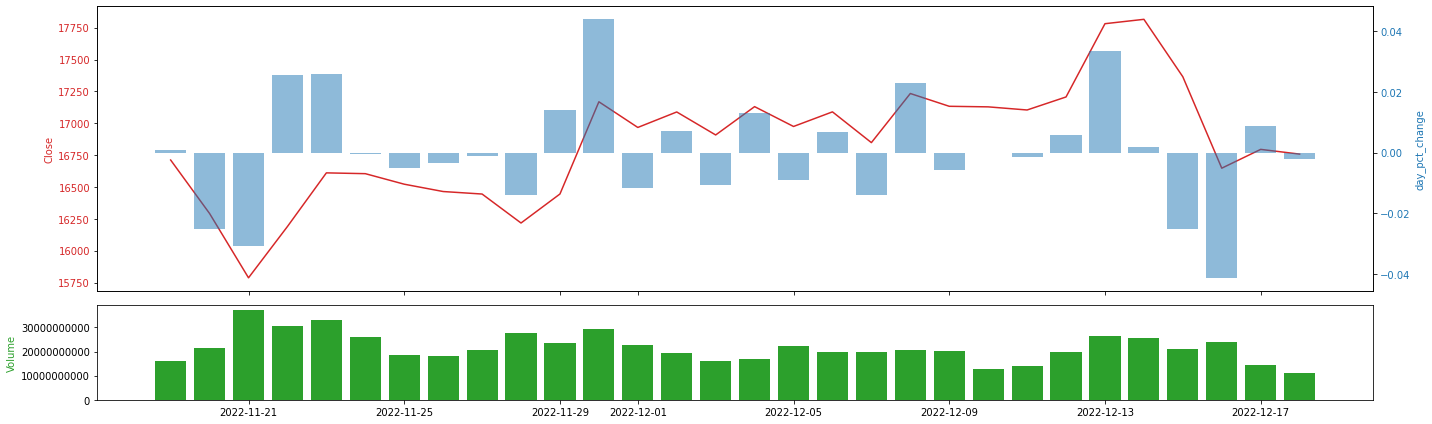

In [ ]:
streak_lengths(df,strt_day=125, end_day=95)
daily_perc_chng(df, strt_day=125, end_day=95)

Largest down streak: 2 days
Largest up streak: 9 days
Number of positive days: 18
Cumulative % change going up: 34.28%
Number of negative days: 12
Cumulative % change going down: -5.96%

% Change from first day to last day: 28.72%

Start price: 16439.6796875 on 2022-12-19 00:00:00+00:00
End price: 21161.51953125 on 2023-01-17 00:00:00+00:00


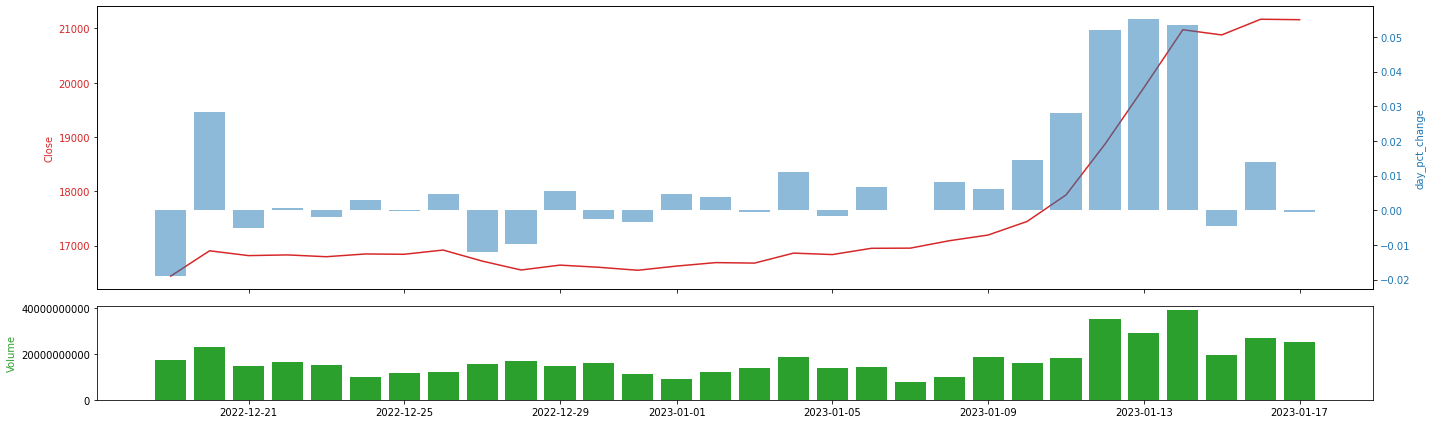

In [ ]:
streak_lengths(df,strt_day=95, end_day=65)
daily_perc_chng(df, strt_day=95, end_day=65)

Largest down streak: 5 days
Largest up streak: 3 days
Number of positive days: 14
Cumulative % change going up: 40.46%
Number of negative days: 16
Cumulative % change going down: -20.52%

% Change from first day to last day: 14.18%

Start price: 20688.78125 on 2023-01-18 00:00:00+00:00
End price: 23623.474609375 on 2023-02-16 00:00:00+00:00


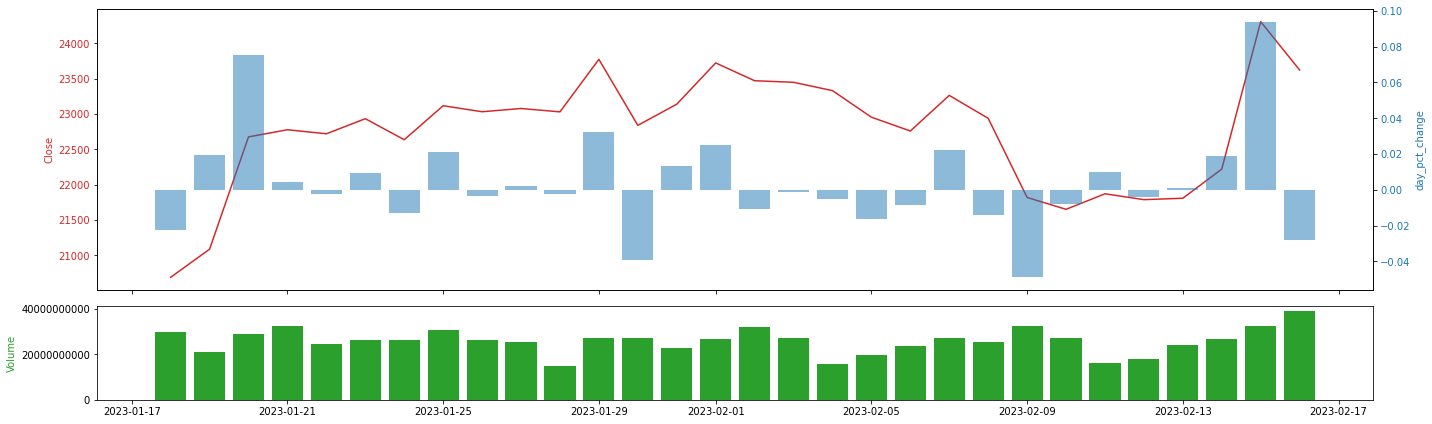

In [ ]:
streak_lengths(df,strt_day=65, end_day=35)
daily_perc_chng(df, strt_day=65, end_day=35)

Largest down streak: 5 days
Largest up streak: 4 days
Number of positive days: 14
Cumulative % change going up: 61.47%
Number of negative days: 20
Cumulative % change going down: -28.41%

% Change from first day to last day: 11.16%

Start price: 24565.6015625 on 2023-02-17 00:00:00+00:00
End price: 27307.4375 on 2023-03-22 00:00:00+00:00


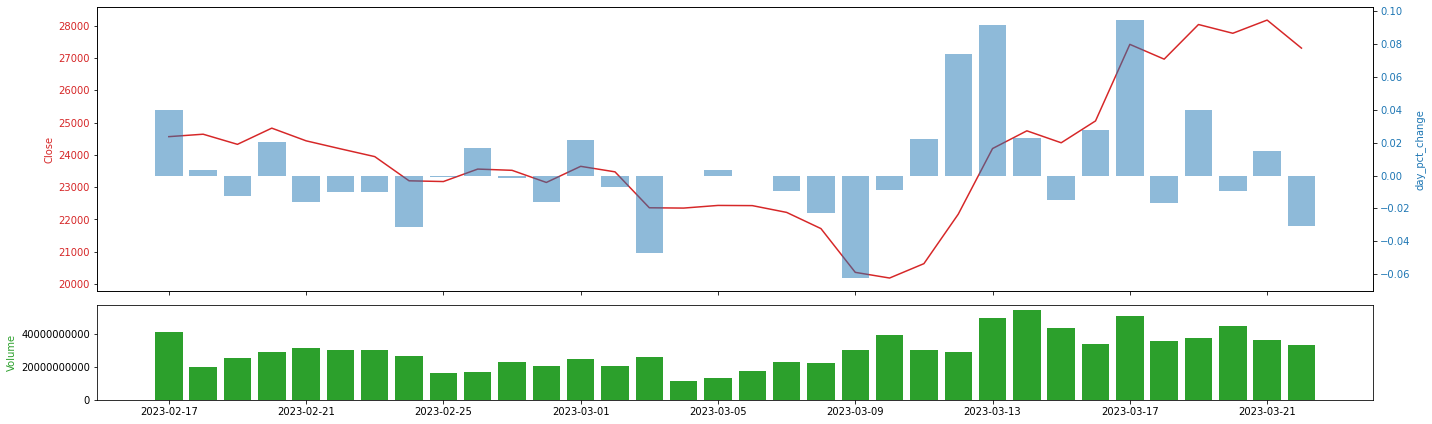

In [ ]:
streak_lengths(df,strt_day=35, end_day=1)
daily_perc_chng(df, strt_day=35, end_day=1)

# ANNUAL

In [ ]:
def daily_perc_chng_nd_rolling(df, strt_day=60, end_day=30,rolling=30):
  last_n_days = df.iloc[-strt_day:-end_day:]
  fig, (ax1, ax2, ax4) = plt.subplots(nrows=3, ncols=1, figsize=(20, 6), sharex=True, gridspec_kw={'height_ratios': [4, 2,4]})

  ax1.set_ylabel('Close', color='tab:red')
  ax1.plot(last_n_days.index, last_n_days['Close'], color='tab:red')
  ax1.tick_params(axis='y', labelcolor='tab:red')

  ax2.set_ylabel('Volume', color='tab:green') 
  ax2.bar(last_n_days.index, last_n_days['Volume'], color='tab:green')
  ax2.yaxis.set_major_formatter('{:.0f}'.format)  # remove scientific notation

  ax3 = ax1.twinx()
  ax3.set_ylabel('day_pct_change', color='tab:blue')
  ax3.bar(last_n_days.index, last_n_days['day_pct_change'], color='tab:blue', alpha=0.5)
  ax3.tick_params(axis='y', labelcolor='tab:blue')

  ax4.set_ylabel('Close', color='tab:red')
  ax4.plot(last_n_days.index, last_n_days['Close'], color='tab:red')
  ax4.tick_params(axis='y', labelcolor='tab:red')
  ax5 = ax4.twinx()
  ax5.set_ylabel('rolling 30d', color='tab:blue') 
  ax5.plot(last_n_days.index, last_n_days['Close'].rolling(window=rolling).mean(), color='magenta', linestyle='--') # add n-day moving average
  ax5.yaxis.set_major_formatter('{:.0f}'.format)  # remove scientific notation

  # calculate cumulative percent change going up and down
  cumulative_up = (1 + last_n_days['day_pct_change'][last_n_days['day_pct_change'] > 0]).cumprod() - 1
  cumulative_down = (1 + last_n_days['day_pct_change'][last_n_days['day_pct_change'] < 0]).cumprod() - 1

  # calculate % change from first day in period to last day in period
  start_price = last_n_days['Close'][0]
  end_price = last_n_days['Close'][-1]
  pct_change = ((end_price - start_price) / start_price) * 100

  # count number of positive and negative days
  pos_days = len(last_n_days[last_n_days['day_pct_change'] > 0])
  neg_days = len(last_n_days[last_n_days['day_pct_change'] < 0])

  # print results
  print(f"Number of positive days: {pos_days}")
  print(f"Cumulative % change going up: {cumulative_up.iloc[-1]*100:.2f}%")
  print(f"Number of negative days: {neg_days}")
  print(f"Cumulative % change going down: {cumulative_down.iloc[-1]*100:.2f}%")
  print("")
  print(f"% Change from first day to last day: {pct_change:.2f}%")
  print("")
  print(f"Start price: {start_price} on {last_n_days.index[0]}")
  print(f"End price: {end_price} on {last_n_days.index[-1]}")

  plt.tight_layout()
  plt.show()

# look at last year % changes daily (2022 - 2023)

Largest down streak: 8 days
Largest up streak: 9 days
Number of positive days: 171
Cumulative % change going up: 3939.75%
Number of negative days: 193
Cumulative % change going down: -98.42%

% Change from first day to last day: -37.88%

Start price: 43960.93359375 on 2022-03-24 00:00:00+00:00
End price: 27307.4375 on 2023-03-22 00:00:00+00:00


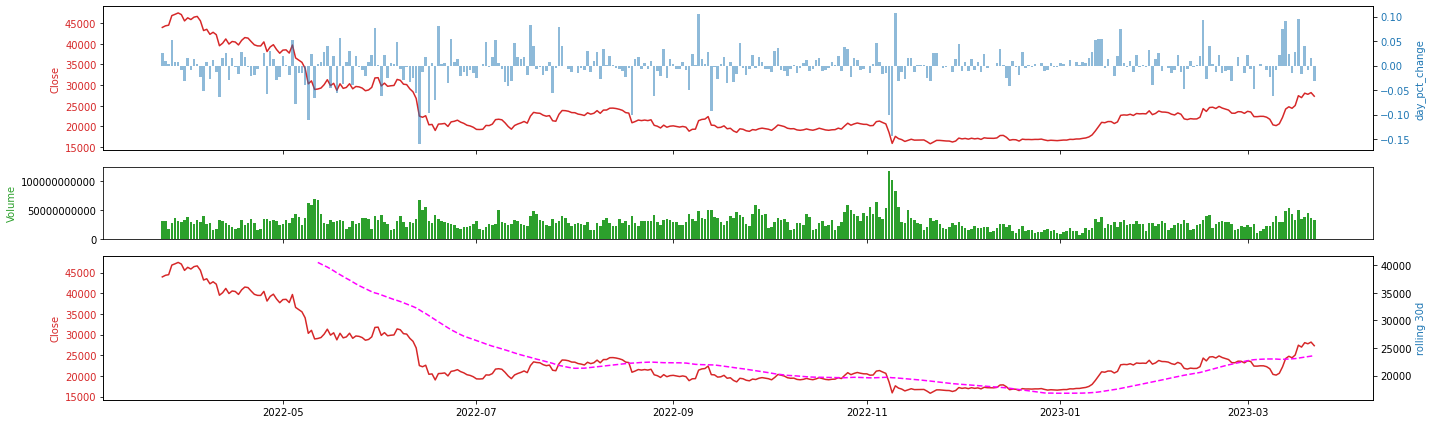

In [ ]:
streak_lengths(df,strt_day=365, end_day=1)
daily_perc_chng_nd_rolling(df, strt_day=365, end_day=1,rolling=50)

# 2021 - 2022

Largest down streak: 6 days
Largest up streak: 10 days
Number of positive days: 183
Cumulative % change going up: 15306.10%
Number of negative days: 182
Cumulative % change going down: -99.49%

% Change from first day to last day: -18.72%

Start price: 52774.265625 on 2021-03-24 00:00:00+00:00
End price: 42892.95703125 on 2022-03-23 00:00:00+00:00


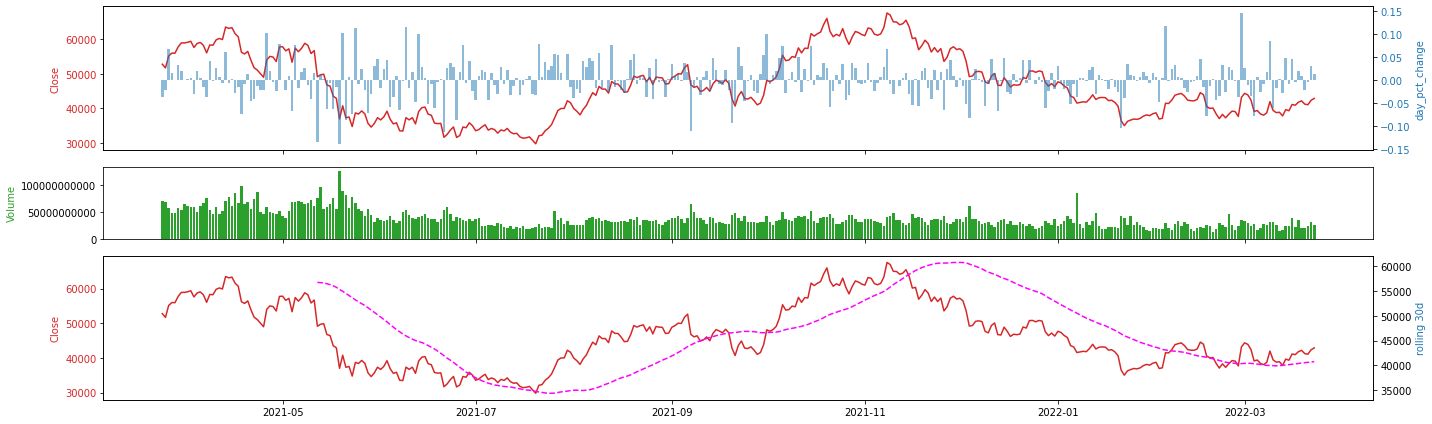

In [ ]:
streak_lengths(df,strt_day=730, end_day=365)
daily_perc_chng_nd_rolling(df, strt_day=730, end_day=365,rolling=50)

# 2020 - 2021

Largest down streak: 5 days
Largest up streak: 8 days
Number of positive days: 209
Cumulative % change going up: 25702.33%
Number of negative days: 156
Cumulative % change going down: -96.69%

% Change from first day to last day: 712.78%

Start price: 6734.8037109375 on 2020-03-24 00:00:00+00:00
End price: 54738.9453125 on 2021-03-23 00:00:00+00:00


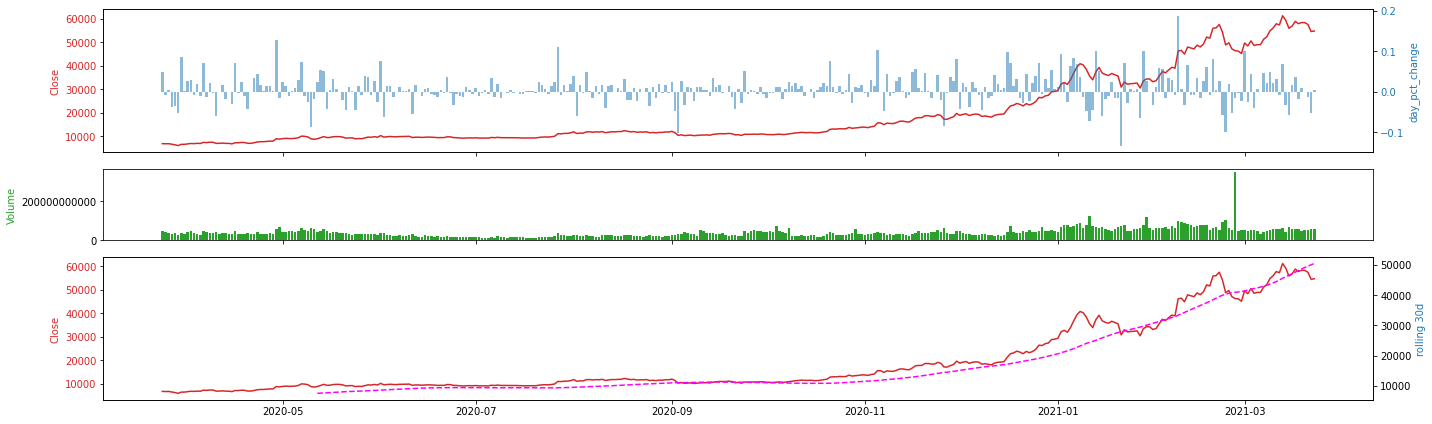

In [ ]:
streak_lengths(df,strt_day=1095, end_day=730)
daily_perc_chng_nd_rolling(df, strt_day=1095, end_day=730,rolling=50)

2019 - 2020

Largest down streak: 7 days
Largest up streak: 8 days
Number of positive days: 186
Cumulative % change going up: 17386.16%
Number of negative days: 179
Cumulative % change going down: -99.09%

% Change from first day to last day: 61.90%

Start price: 3963.070556640625 on 2019-03-25 00:00:00+00:00
End price: 6416.31494140625 on 2020-03-23 00:00:00+00:00


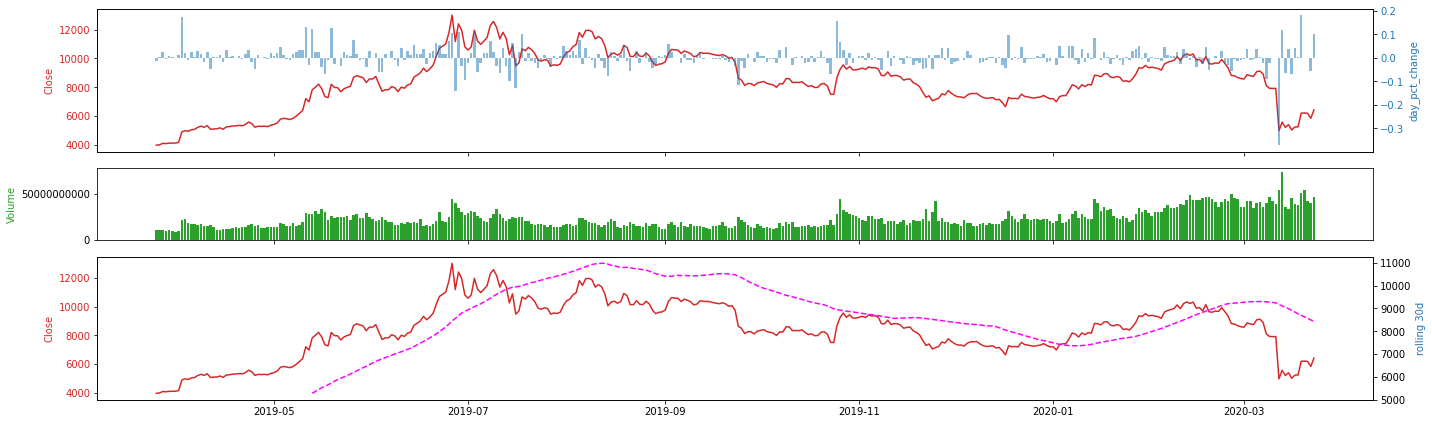

In [ ]:
streak_lengths(df,strt_day=1460, end_day=1095)
daily_perc_chng_nd_rolling(df, strt_day=1460, end_day=1095,rolling=50)

2018 - 2019

Largest down streak: 6 days
Largest up streak: 7 days
Number of positive days: 189
Cumulative % change going up: 3655.44%
Number of negative days: 176
Cumulative % change going down: -98.76%

% Change from first day to last day: -52.66%

Start price: 8495.7802734375 on 2018-03-25 00:00:00+00:00
End price: 4022.168212890625 on 2019-03-24 00:00:00+00:00


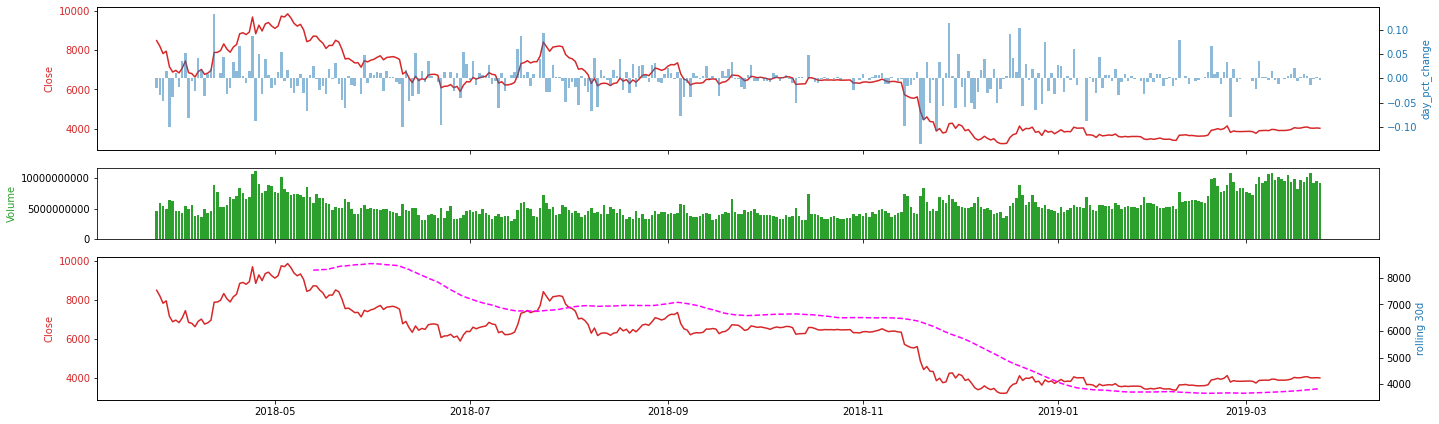

In [ ]:
streak_lengths(df,strt_day=1825, end_day=1460)
daily_perc_chng_nd_rolling(df, strt_day=1825, end_day=1460,rolling=50)